# 04_analysis.ipynb — Wildfire Insurance Exposure & FAIR Plan Comparison (CA, 2022)

This notebook (`04_analysis.ipynb`) performs a visual and spatial evaluation of **predicted vs. actual insurance metrics** across California ZIP codes for the year 2022. It is a core component of the broader *Climate Insurance Redlining* project, focusing on model performance for wildfire-related exposure and FAIR Plan participation.


#### Exposure Analysis
- **Predicted Exposure** vs **Actual Exposure**
- **Difference Map** showing over/underprediction (color-coded)

#### FAIR Plan Analysis
- **Predicted FAIR Plan %** vs **Actual FAIR Plan %**
- **Difference Map** visualizing prediction error

All maps are color-normalized for interpretability and rendered with a consistent California ZIP code overlay.

## Key Takeaways

- Model **underpredicts exposure** in wildfire-prone regions of Northern California.
- FAIR Plan participation is **significantly underestimated** in high-risk ZIP codes.
- Visual discrepancy maps are effective at pinpointing model weaknesses.



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import geopandas as gpd


In [21]:
df1=pd.read_csv("clean_data/engineered_dataset.csv")
df2=pd.read_csv("clean_data/best_predictions.csv")
df3=pd.read_csv("clean_data/exposure_predictions.csv")



In [22]:
df = pd.merge(df1, df2, on='ZIP Code')

In [23]:
df.sample(1)

,ZIP Code,Housing Units,Median Gross Rent ($),Median Owner Cost ($),Median Owner Cost ($) - 2019,% Change - Owner Cost ($),Median Home Value - Census ($),New Policies,Renewed Policies,Nonrenewed Policies (by Owner),...,Growth in Losses to Fire Disasters 10yr Ratio,Premium to Exposure Ratio,Nonrenewal Rate,Loss Burden per Unit,Loss Burden per Exposure,Premium Adequacy,Renewal Resilience,ZIP Code.1,True Value,Predictions (GB)
747,94301,8004.0,2788.0,1132.0,1127.0,0.004437,2000001.0,1436.0,16127.0,1247.0,...,13.705925,8793.453743,0.082807,2686.548641,2686.548641,3.273141,0.917193,94301,0.002146,0.062964


#### FAIR Plan Analysis 2022

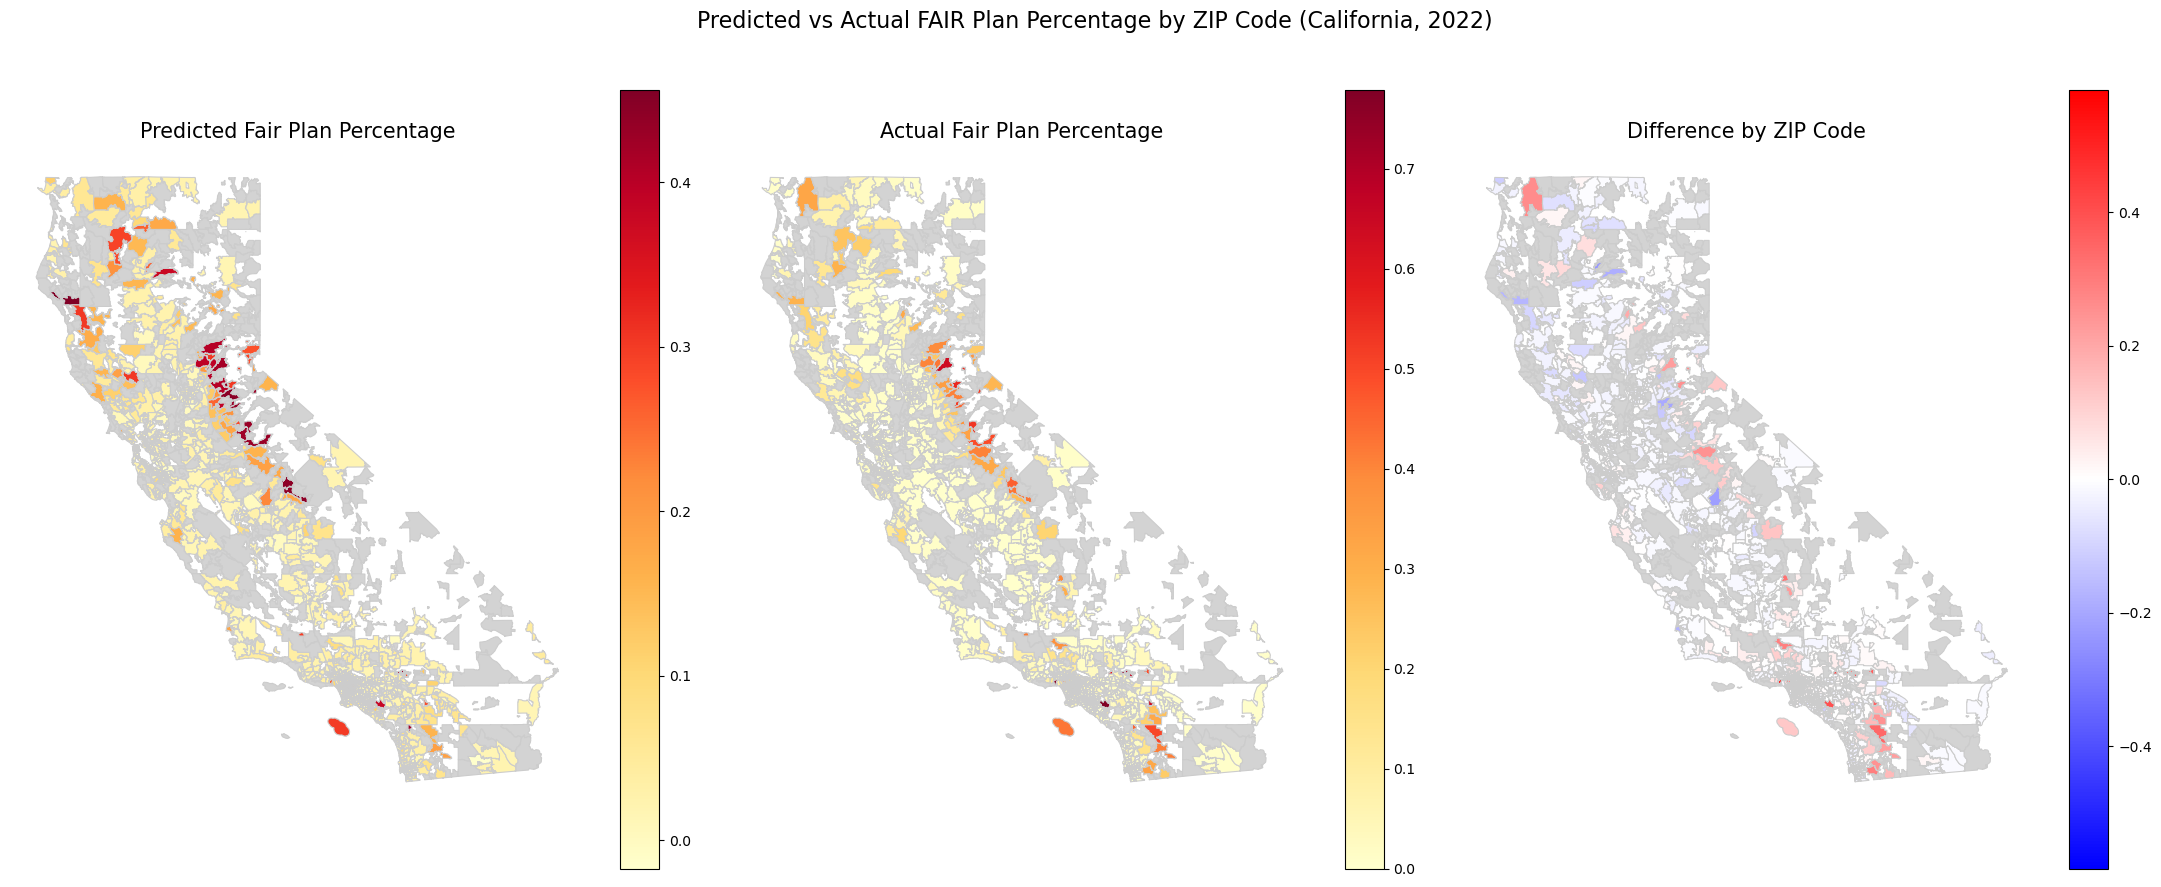

In [24]:

df["ZIP Code"] = df["ZIP Code"].astype(str).str.zfill(5)  # Ensure ZIPs are 5-digit strings

# Load ZIP code shapefile or GeoJSON
zip_geo = gpd.read_feather("clean_data/ca_zipcodes.feather")

# Merge your data with the shapefile
merged = zip_geo.merge(df, on="ZIP Code", how="left")

merged['Prediction Difference']= merged['% FAIR Plan Units'] - merged['Predictions (GB)']

vmax = merged["Prediction Difference"].abs().max()

# Plot the heatmap
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(22, 9))

merged.plot(column="Predictions (GB)",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax1,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax1.set_title("Predicted Fair Plan Percentage", fontsize=15)
ax1.axis("off")

merged.plot(column="% FAIR Plan Units",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax2,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax2.set_title("Actual Fair Plan Percentage", fontsize=15)
ax2.axis("off")

merged.plot(column="Prediction Difference",
            cmap="bwr",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax3,
            vmax=vmax,
            vmin=-vmax,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax3.set_title("Difference by ZIP Code", fontsize=15)
ax3.axis("off")


plt.suptitle("Predicted vs Actual FAIR Plan Percentage by ZIP Code (California, 2022)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


#### Exposure Analysis 2022

In [25]:
dfe = pd.merge(df1, df3, on='ZIP Code')

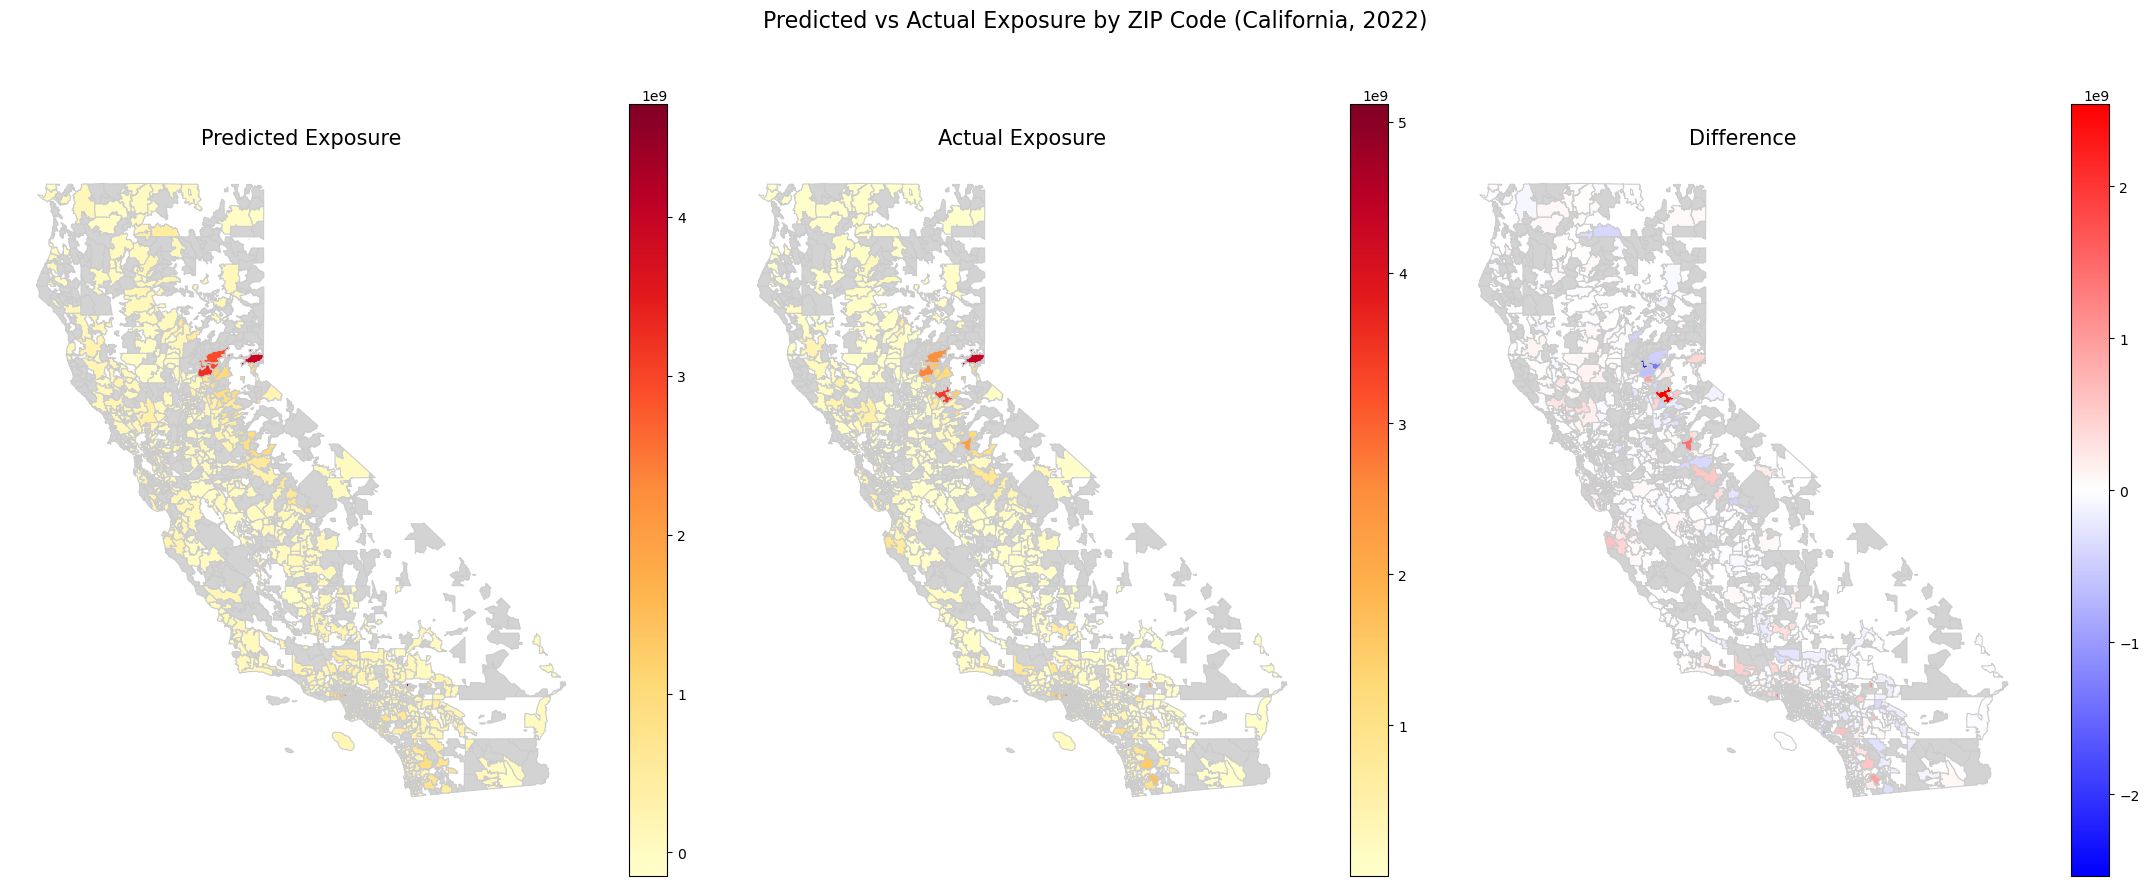

In [26]:
dfe["ZIP Code"] = dfe["ZIP Code"].astype(str).str.zfill(5)  # Ensure ZIPs are 5-digit strings

# Load ZIP code shapefile or GeoJSON
zip_geo = gpd.read_feather("clean_data/ca_zipcodes.feather")

# Merge your data with the shapefile
merged = zip_geo.merge(dfe, on="ZIP Code", how="left")

merged['Prediction Difference']= merged['True Value'] - merged['Predictions (GB)']

vmax = merged["Prediction Difference"].abs().max()

# Plot the heatmap
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(22, 9))

merged.plot(column="Predictions (GB)",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax1,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax1.set_title("Predicted Exposure", fontsize=15)
ax1.axis("off")

merged.plot(column="True Value",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax2,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax2.set_title("Actual Exposure", fontsize=15)
ax2.axis("off")

merged.plot(column="Prediction Difference",
            cmap="bwr",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax3,
            vmax=vmax,
            vmin=-vmax,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax3.set_title("Difference", fontsize=15)
ax3.axis("off")


plt.suptitle("Predicted vs Actual Exposure by ZIP Code (California, 2022)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

#### Main Model Features

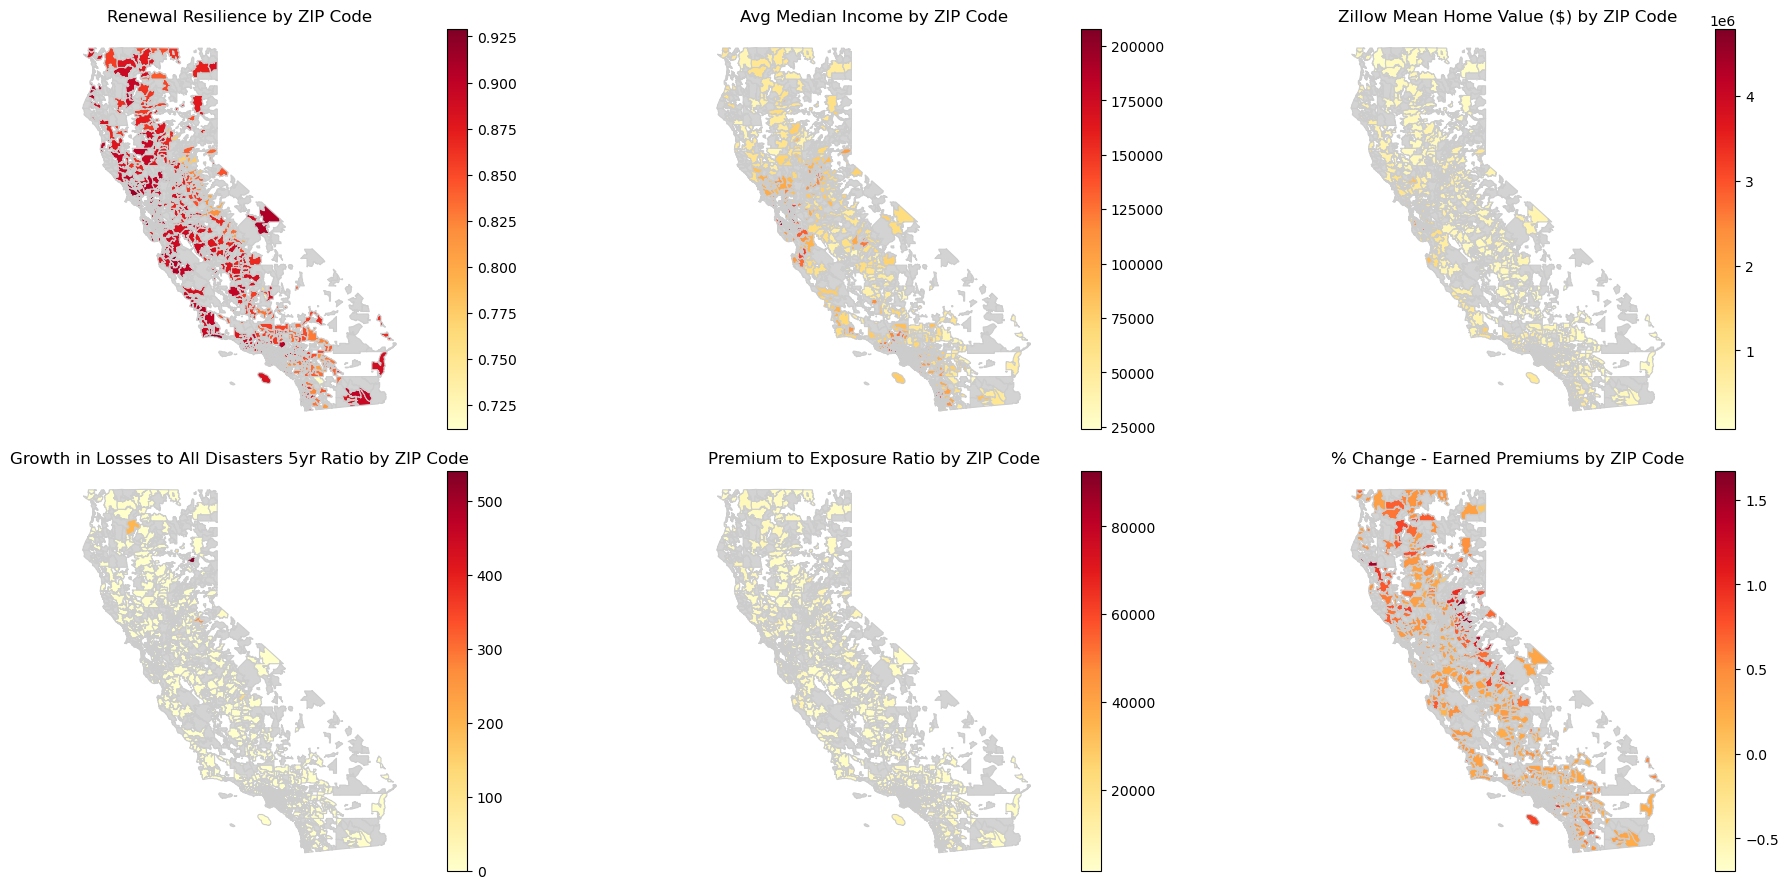

In [28]:
main_features = [
    'Renewal Resilience', 
    'Avg Median Income', 
    'Zillow Mean Home Value ($)',
    'Growth in Losses to All Disasters 5yr Ratio',
    'Premium to Exposure Ratio',
    '% Change - Earned Premiums'
]



# Create subplots
n = len(main_features)
fig, axes = plt.subplots(nrows=2, ncols=(n + 1) // 2, figsize=(20, 9))
axes = axes.flatten()

for i, feature in enumerate(main_features):
    ax = axes[i]
    

    merged.plot(
        column=feature,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor="0.8",
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "label": "No Data"
        }
    )

    ax.set_title(f"{feature} by ZIP Code", fontsize=12)
    ax.axis("off")

# Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()